In [51]:
import matplotlib
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import json
import requests

In [52]:
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json") as url:
    data = json.loads(url.read().decode())
    print(data)

{'pokemon': [{'id': 1, 'num': '001', 'name': 'Bulbasaur', 'img': 'http://www.serebii.net/pokemongo/pokemon/001.png', 'type': ['Grass', 'Poison'], 'height': '0.71 m', 'weight': '6.9 kg', 'candy': 'Bulbasaur Candy', 'candy_count': 25, 'egg': '2 km', 'spawn_chance': 0.69, 'avg_spawns': 69, 'spawn_time': '20:00', 'multipliers': [1.58], 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'], 'next_evolution': [{'num': '002', 'name': 'Ivysaur'}, {'num': '003', 'name': 'Venusaur'}]}, {'id': 2, 'num': '002', 'name': 'Ivysaur', 'img': 'http://www.serebii.net/pokemongo/pokemon/002.png', 'type': ['Grass', 'Poison'], 'height': '0.99 m', 'weight': '13.0 kg', 'candy': 'Bulbasaur Candy', 'candy_count': 100, 'egg': 'Not in Eggs', 'spawn_chance': 0.042, 'avg_spawns': 4.2, 'spawn_time': '07:00', 'multipliers': [1.2, 1.6], 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'], 'prev_evolution': [{'num': '001', 'name': 'Bulbasaur'}], 'next_evolution': [{'num': '003', 'name': 'Venusaur'}]}, {'id': 3, 'num': '003'

In [53]:
get_request = requests.get("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")

In [55]:
get_request.text

'{\n  "pokemon": [{\n    "id": 1,\n    "num": "001",\n    "name": "Bulbasaur",\n    "img": "http://www.serebii.net/pokemongo/pokemon/001.png",\n    "type": [\n      "Grass",\n      "Poison"\n    ],\n    "height": "0.71 m",\n    "weight": "6.9 kg",\n    "candy": "Bulbasaur Candy",\n    "candy_count": 25,\n    "egg": "2 km",\n    "spawn_chance": 0.69,\n    "avg_spawns": 69,\n    "spawn_time": "20:00",\n    "multipliers": [1.58],\n    "weaknesses": [\n      "Fire",\n      "Ice",\n      "Flying",\n      "Psychic"\n    ],\n    "next_evolution": [{\n      "num": "002",\n      "name": "Ivysaur"\n    }, {\n      "num": "003",\n      "name": "Venusaur"\n    }]\n  }, {\n    "id": 2,\n    "num": "002",\n    "name": "Ivysaur",\n    "img": "http://www.serebii.net/pokemongo/pokemon/002.png",\n    "type": [\n      "Grass",\n      "Poison"\n    ],\n    "height": "0.99 m",\n    "weight": "13.0 kg",\n    "candy": "Bulbasaur Candy",\n    "candy_count": 100,\n    "egg": "Not in Eggs",\n    "spawn_chance":

In [56]:
pokemon_dict = json.loads(get_request.text)

In [57]:
pokemon_dict.keys()

dict_keys(['pokemon'])

In [59]:
pokemon_dict['pokemon']

[{'avg_spawns': 69,
  'candy': 'Bulbasaur Candy',
  'candy_count': 25,
  'egg': '2 km',
  'height': '0.71 m',
  'id': 1,
  'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
  'multipliers': [1.58],
  'name': 'Bulbasaur',
  'next_evolution': [{'name': 'Ivysaur', 'num': '002'},
   {'name': 'Venusaur', 'num': '003'}],
  'num': '001',
  'spawn_chance': 0.69,
  'spawn_time': '20:00',
  'type': ['Grass', 'Poison'],
  'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
  'weight': '6.9 kg'},
 {'avg_spawns': 4.2,
  'candy': 'Bulbasaur Candy',
  'candy_count': 100,
  'egg': 'Not in Eggs',
  'height': '0.99 m',
  'id': 2,
  'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
  'multipliers': [1.2, 1.6],
  'name': 'Ivysaur',
  'next_evolution': [{'name': 'Venusaur', 'num': '003'}],
  'num': '002',
  'prev_evolution': [{'name': 'Bulbasaur', 'num': '001'}],
  'spawn_chance': 0.042,
  'spawn_time': '07:00',
  'type': ['Grass', 'Poison'],
  'weaknesses': ['Fire', 'Ice', 'Flying', 'Psy

In [60]:
pokedex = pd.Series(pokemon_dict['pokemon'])

In [61]:
pokedex.head()

0    {'id': 1, 'num': '001', 'name': 'Bulbasaur', '...
1    {'id': 2, 'num': '002', 'name': 'Ivysaur', 'im...
2    {'id': 3, 'num': '003', 'name': 'Venusaur', 'i...
3    {'id': 4, 'num': '004', 'name': 'Charmander', ...
4    {'id': 5, 'num': '005', 'name': 'Charmeleon', ...
dtype: object

In [65]:
list(pokedex)

[{'avg_spawns': 69,
  'candy': 'Bulbasaur Candy',
  'candy_count': 25,
  'egg': '2 km',
  'height': '0.71 m',
  'id': 1,
  'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
  'multipliers': [1.58],
  'name': 'Bulbasaur',
  'next_evolution': [{'name': 'Ivysaur', 'num': '002'},
   {'name': 'Venusaur', 'num': '003'}],
  'num': '001',
  'spawn_chance': 0.69,
  'spawn_time': '20:00',
  'type': ['Grass', 'Poison'],
  'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
  'weight': '6.9 kg'},
 {'avg_spawns': 4.2,
  'candy': 'Bulbasaur Candy',
  'candy_count': 100,
  'egg': 'Not in Eggs',
  'height': '0.99 m',
  'id': 2,
  'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
  'multipliers': [1.2, 1.6],
  'name': 'Ivysaur',
  'next_evolution': [{'name': 'Venusaur', 'num': '003'}],
  'num': '002',
  'prev_evolution': [{'name': 'Bulbasaur', 'num': '001'}],
  'spawn_chance': 0.042,
  'spawn_time': '07:00',
  'type': ['Grass', 'Poison'],
  'weaknesses': ['Fire', 'Ice', 'Flying', 'Psy

In [69]:
df = pd.DataFrame.from_dict(json_normalize(data['pokemon']), orient = 'columns')
print(df)

     avg_spawns                     candy  candy_count            egg  height  \
0        69.000           Bulbasaur Candy         25.0           2 km  0.71 m   
1         4.200           Bulbasaur Candy        100.0    Not in Eggs  0.99 m   
2         1.700           Bulbasaur Candy          NaN    Not in Eggs  2.01 m   
3        25.300          Charmander Candy         25.0           2 km  0.61 m   
4         1.200          Charmander Candy        100.0    Not in Eggs  1.09 m   
5         0.310          Charmander Candy          NaN    Not in Eggs  1.70 m   
6        58.000            Squirtle Candy         25.0           2 km  0.51 m   
7         3.400            Squirtle Candy        100.0    Not in Eggs  0.99 m   
8         0.670            Squirtle Candy          NaN    Not in Eggs  1.60 m   
9       303.200            Caterpie Candy         12.0           2 km  0.30 m   
10       18.700            Caterpie Candy         50.0    Not in Eggs  0.71 m   
11        2.200            C

After struggling for a bit, I was able to format my JSON data and put the dictionary values in as a DF. This arranges my data how I need it in order to analyze it.

In [71]:
df.isnull()

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


The null values are actually not an issue with this data set. They are telling of the type of pokemon. For example, pokemon who are the fully evolved stage cannot evolve further and thus this value is null. Furthermore, that pokemon cannot benefit from rare candys, etc.

Usually null values could be an issue in a data set, but in this case they are informative.

In [73]:
ash = df[['name', 'weight', 'weaknesses']]
dtype
print(ash)

                   name    weight                             weaknesses
0             Bulbasaur    6.9 kg           [Fire, Ice, Flying, Psychic]
1               Ivysaur   13.0 kg           [Fire, Ice, Flying, Psychic]
2              Venusaur  100.0 kg           [Fire, Ice, Flying, Psychic]
3            Charmander    8.5 kg                  [Water, Ground, Rock]
4            Charmeleon   19.0 kg                  [Water, Ground, Rock]
5             Charizard   90.5 kg                [Water, Electric, Rock]
6              Squirtle    9.0 kg                      [Electric, Grass]
7             Wartortle   22.5 kg                      [Electric, Grass]
8             Blastoise   85.5 kg                      [Electric, Grass]
9              Caterpie    2.9 kg                   [Fire, Flying, Rock]
10              Metapod    9.9 kg                   [Fire, Flying, Rock]
11           Butterfree   32.0 kg    [Fire, Electric, Ice, Flying, Rock]
12               Weedle    3.2 kg          [Fire, F

I am interested in seeing how weight relates with weaknesses of pokemon, so I created a new data frame omitting the columns that were not of interest to me.

In [100]:
[float(w.split()[0]) for w in ash.weight]

[6.9,
 13.0,
 100.0,
 8.5,
 19.0,
 90.5,
 9.0,
 22.5,
 85.5,
 2.9,
 9.9,
 32.0,
 3.2,
 10.0,
 29.5,
 1.8,
 30.0,
 39.5,
 3.5,
 18.5,
 2.0,
 38.0,
 6.9,
 65.0,
 6.0,
 30.0,
 12.0,
 29.5,
 7.0,
 20.0,
 60.0,
 9.0,
 19.5,
 62.0,
 7.5,
 40.0,
 9.9,
 19.9,
 5.5,
 12.0,
 7.5,
 55.0,
 5.4,
 8.6,
 18.6,
 5.4,
 29.5,
 30.0,
 12.5,
 0.8,
 33.3,
 4.2,
 32.0,
 19.6,
 76.6,
 28.0,
 32.0,
 19.0,
 155.0,
 12.4,
 20.0,
 54.0,
 19.5,
 56.5,
 48.0,
 19.5,
 70.5,
 130.0,
 4.0,
 6.4,
 15.5,
 45.5,
 55.0,
 20.0,
 105.0,
 300.0,
 30.0,
 95.0,
 36.0,
 78.5,
 6.0,
 60.0,
 15.0,
 39.2,
 85.2,
 90.0,
 120.0,
 30.0,
 30.0,
 4.0,
 132.5,
 0.1,
 0.1,
 40.5,
 210.0,
 32.4,
 75.6,
 6.5,
 60.0,
 10.4,
 66.6,
 2.5,
 120.0,
 6.5,
 45.0,
 49.8,
 50.2,
 65.5,
 1.0,
 9.5,
 115.0,
 120.0,
 34.6,
 35.0,
 80.0,
 8.0,
 25.0,
 15.0,
 39.0,
 34.5,
 80.0,
 54.5,
 56.0,
 40.6,
 30.0,
 44.5,
 55.0,
 88.4,
 10.0,
 235.0,
 220.0,
 4.0,
 6.5,
 29.0,
 24.5,
 25.0,
 36.5,
 7.5,
 35.0,
 11.5,
 40.5,
 59.0,
 460.0,
 55.4,
 52.6,
 60.0,
 

This enabled me to use weight as an integer instead of keeping it as a string value

In [101]:
weight = [float(w.split()[0]) for w in ash.weight]

In [87]:
ash.weaknesses

0               [Fire, Ice, Flying, Psychic]
1               [Fire, Ice, Flying, Psychic]
2               [Fire, Ice, Flying, Psychic]
3                      [Water, Ground, Rock]
4                      [Water, Ground, Rock]
5                    [Water, Electric, Rock]
6                          [Electric, Grass]
7                          [Electric, Grass]
8                          [Electric, Grass]
9                       [Fire, Flying, Rock]
10                      [Fire, Flying, Rock]
11       [Fire, Electric, Ice, Flying, Rock]
12             [Fire, Flying, Psychic, Rock]
13             [Fire, Flying, Psychic, Rock]
14             [Fire, Flying, Psychic, Rock]
15                          [Electric, Rock]
16                          [Electric, Rock]
17                          [Electric, Rock]
18                                [Fighting]
19                                [Fighting]
20                          [Electric, Rock]
21                          [Electric, Rock]
22        

In [90]:
[len(weaknesses) for weaknesses in ash.weaknesses]

[4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 5,
 4,
 4,
 4,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 4,
 2,
 2,
 4,
 1,
 1,
 3,
 3,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 4,
 4,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 6,
 6,
 6,
 3,
 3,
 5,
 5,
 3,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 6,
 3,
 3,
 2,
 2,
 1,
 1,
 7,
 7,
 3,
 3,
 3,
 3,
 1,
 2,
 2,
 6,
 6,
 1,
 5,
 1,
 2,
 2,
 2,
 2,
 2,
 5,
 3,
 5,
 6,
 1,
 3,
 3,
 1,
 2,
 2,
 4,
 1,
 1,
 2,
 1,
 3,
 1,
 4,
 4,
 4,
 4,
 5,
 1,
 4,
 2,
 3,
 3,
 3,
 4,
 3,
 3]

In [107]:
num_weaknesses = [len(weaknesses) for weaknesses in ash.weaknesses]

In [108]:
num_weaknesses

[4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 5,
 4,
 4,
 4,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 4,
 2,
 2,
 4,
 1,
 1,
 3,
 3,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 4,
 4,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 6,
 6,
 6,
 3,
 3,
 5,
 5,
 3,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 6,
 3,
 3,
 2,
 2,
 1,
 1,
 7,
 7,
 3,
 3,
 3,
 3,
 1,
 2,
 2,
 6,
 6,
 1,
 5,
 1,
 2,
 2,
 2,
 2,
 2,
 5,
 3,
 5,
 6,
 1,
 3,
 3,
 1,
 2,
 2,
 4,
 1,
 1,
 2,
 1,
 3,
 1,
 4,
 4,
 4,
 4,
 5,
 1,
 4,
 2,
 3,
 3,
 3,
 4,
 3,
 3]

In [110]:
oaks = [i for i in zip(num_weaknesses, weight)]
labels = ['Number of Weaknesses', 'Weight (kg)']
df1 = pd.DataFrame.from_records(oaks, columns=labels)

In [113]:
df1.head()

,Number of Weaknesses,Weight (kg)
0,4,6.9
1,4,13.0
2,4,100.0
3,3,8.5
4,3,19.0


This created a new df with integer values for the weight of the pokemon and the number of weaknesses that they have. This was the final step needed in order to check and visualize the covariances.

In [114]:
df1.corr()

,Number of Weaknesses,Weight (kg)
Number of Weaknesses,1.000000,0.167789
Weight (kg),0.167789,1.000000


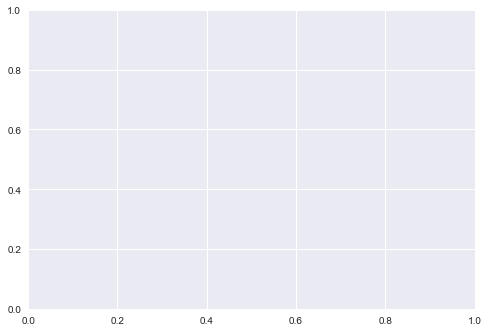

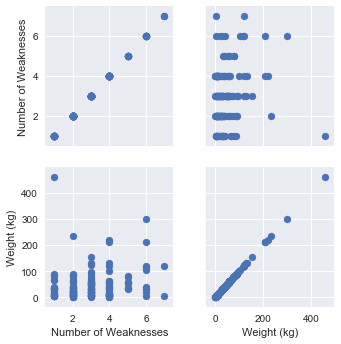

In [115]:
correlation = sns.PairGrid(df1)
correlation.map(plt.scatter)
plt.show()

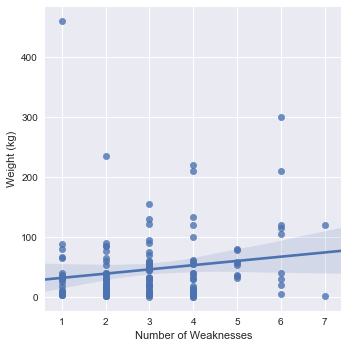

In [117]:
sns.lmplot(x="Number of Weaknesses", y="Weight (kg)", data=df1)
plt.show()

Interestingly enough, the number of weaknesses is not really correlated with the weight of the pokemon. That is why it is important for each trainer to know their pokemon well and not just guess off of size.